# Aufgaben der dritten Vorlesung

**Aufgabe 1**

In [115]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df_old = pd.read_csv('credit.csv')
df = df_old[df_old['Balance'] > 0]
df.drop_duplicates()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
394,49.794,5758,410,4,40,8,Male,No,No,Caucasian,734
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138


**Aufgabe 2**

In [116]:
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

In [117]:
x = df['Balance']
y = df['Rating']

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train.head()

356    962
143    710
74     945
88     579
211    799
Name: Balance, dtype: int64

In [119]:
import statsmodels.api as sm

# Addiere Konstante auf die X-Werte
X_train_sm = sm.add_constant(X_train)

# Fitten einer Regressionsgeraden mit Ordinary Least Squares 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Übersicht über die Parameter
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     322.0
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           5.07e-45
Time:                        10:43:41   Log-Likelihood:                -1298.8
No. Observations:                 223   AIC:                             2602.
Df Residuals:                     221   BIC:                             2608.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        236.3175     10.630     22.230      0.0

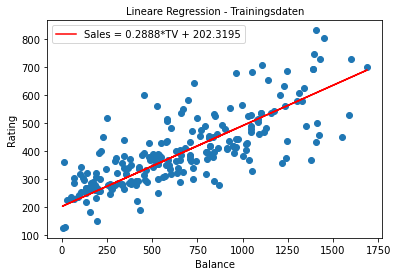

In [120]:
# Grafik mit Regressionsgerade
plt.scatter(X_train, y_train)
plt.plot(X_train, 202.3195 + 0.2888*X_train, 'r', label='Sales = 0.2888*TV + 202.3195')
plt.title('Lineare Regression - Trainingsdaten', fontsize=10)
plt.xlabel('Balance')
plt.ylabel('Rating')
plt.legend()
plt.show()

Mit diesem Model wird eine Güte (R^2) von 0.593 erreicht.

**Aufgabe 3**

In [121]:
df = df.replace('Yes', 1)
df = df.replace('No', 0)

In [122]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True).astype(int)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    df.replace('Yes', 1)
    return df

df1 = dummies('Gender', df)
df1 = dummies('Ethnicity', df1)

In [123]:
np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

,Income,Limit,Rating,Cards,Age,Education,Student,Married,Balance,Female,Asian,Caucasian
356,34.480,6090,442,3,36,14,0,0,962,0,0,1
143,19.636,4896,387,3,64,10,0,0,710,1,0,0
74,16.103,5390,418,4,45,10,0,1,945,1,0,1
88,15.560,4307,352,4,57,8,0,1,579,0,0,0
211,29.567,5309,397,3,25,15,0,0,799,0,0,1


In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['Income','Limit','Rating','Cards','Age','Education']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Income,Limit,Rating,Cards,Age,Education,Student,Married,Balance,Female,Asian,Caucasian
356,0.141644,0.456228,0.447592,0.250,0.191176,0.600000,0,0,962,0,0,1
143,0.054495,0.345734,0.369688,0.250,0.602941,0.333333,0,0,710,1,0,0
74,0.033753,0.391449,0.413598,0.375,0.323529,0.333333,0,1,945,1,0,1
88,0.030565,0.291227,0.320113,0.375,0.500000,0.200000,0,1,579,0,0,0
211,0.112800,0.383953,0.383853,0.250,0.029412,0.666667,0,0,799,0,0,1


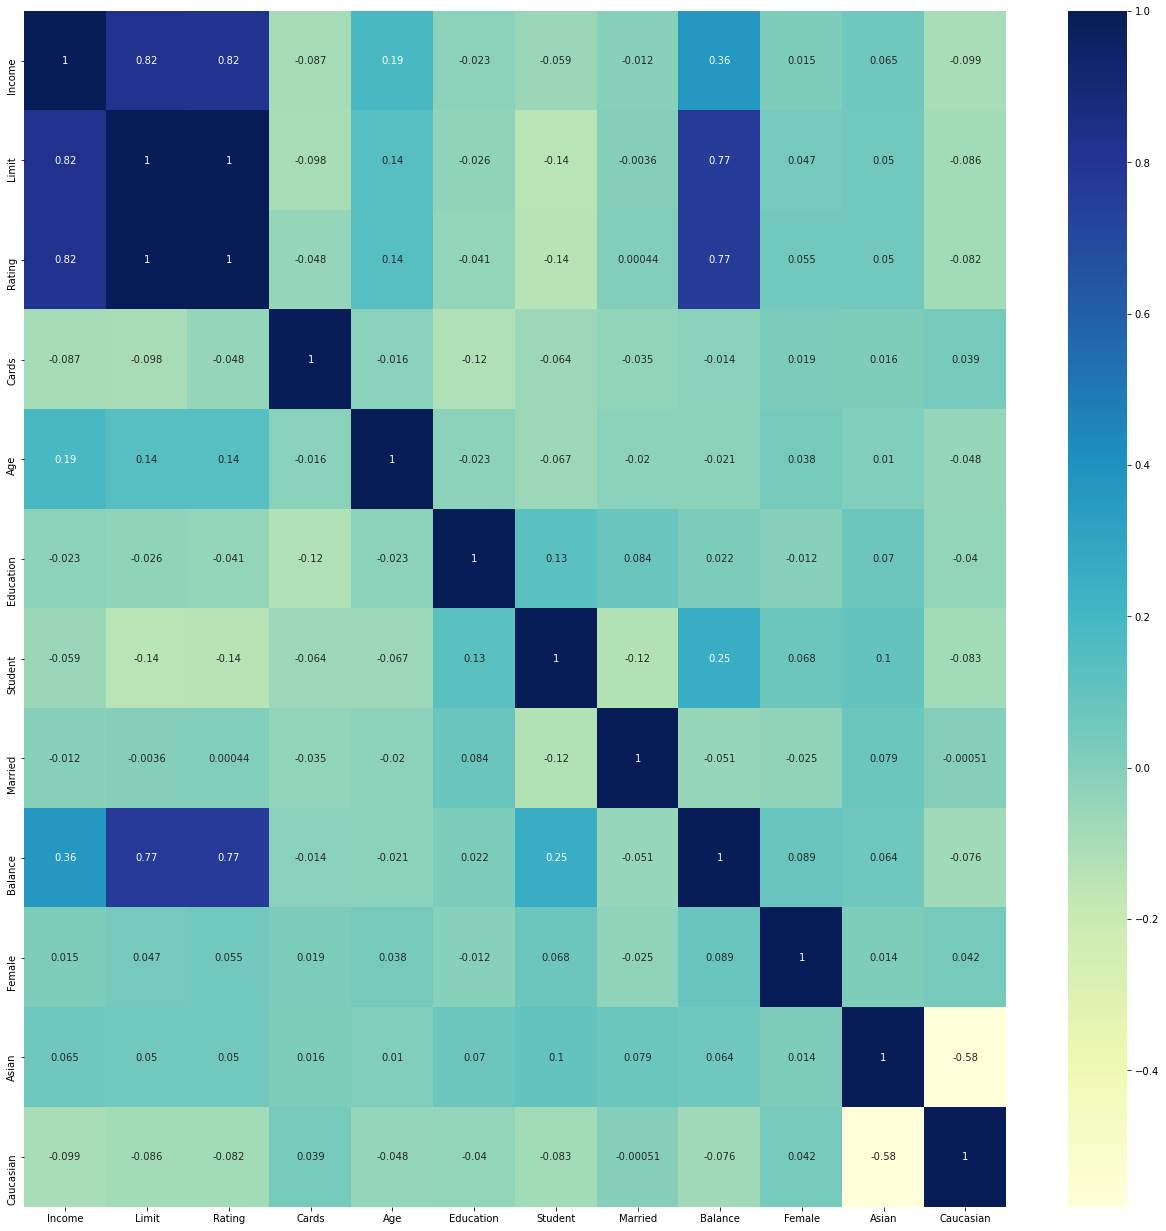

In [125]:
plt.figure(figsize = (22, 22))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [126]:
y_train = df_train.pop('Balance')
X_train = df_train
X_train.head()

,Income,Limit,Rating,Cards,Age,Education,Student,Married,Female,Asian,Caucasian
356,0.141644,0.456228,0.447592,0.250,0.191176,0.600000,0,0,0,0,1
143,0.054495,0.345734,0.369688,0.250,0.602941,0.333333,0,0,1,0,0
74,0.033753,0.391449,0.413598,0.375,0.323529,0.333333,0,1,1,0,1
88,0.030565,0.291227,0.320113,0.375,0.500000,0.200000,0,1,0,0,0
211,0.112800,0.383953,0.383853,0.250,0.029412,0.666667,0,0,0,0,1


In [127]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)


In [129]:
#X_train.columns[rfe.support_]

In [136]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
#X_train_rfe = X_train

In [137]:
#function Modellbildung
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

#function Prüfen des variance inflation factors (zeigt Kolinearität)
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

**Modell 1**

In [138]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.793e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):          9.63e-282
Time:                        10:48:17   Log-Likelihood:                -979.99
No. Observations:                 223   AIC:                             1972.
Df Residuals:                     217   BIC:                             1992.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -462.9322      5.022    -92.177      0.0

**Modell 2**

Cards hat einen großen p-Wert, entfernen

In [133]:
X_train_new = X_train_rfe.drop(["Cards"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3197.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):          3.39e-225
Time:                        10:43:45   Log-Likelihood:                -1091.9
No. Observations:                 223   AIC:                             2206.
Df Residuals:                     212   BIC:                             2243.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -347.1775     10.981    -31.616      0.0

In [134]:
checkVIF(X_train_new)

,Features,VIF
2,Limit,118.22
3,Rating,116.32
0,const,24.39
1,Income,3.19
9,Asian,1.54
10,Caucasian,1.54
6,Student,1.09
5,Education,1.06
4,Age,1.05
7,Married,1.04


Text(0.5, 0, 'Errors')

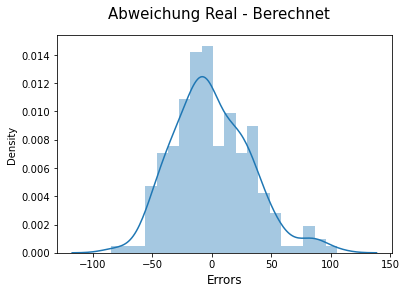

In [135]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Abweichung Real - Berechnet', fontsize = 15)                  # Plot heading
plt.xlabel('Errors', fontsize = 12)

Dieses Modell erreicht eine Güte von 0.993

**Aufgabe 4**

- sehr bedeutend -> Limit, Rating, Income, (Student)
- siehe Heatmap

**Aufgabe 5**

- Weil sich dann das gesamt Modell richtung null verschiebt.